### Importing Libraries and Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("merged_data_after_dummies.csv")
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [3]:
df = df.sample(frac=1)
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
269,0.0,1.0,38.0,60.0,-94.0,360184.0,224520.0,47677.0,81076.0,21971.0,...,29442.0,41282.0,0.0,1.0,25,0,0,1,0,1
10834,8.0,4.0,41.0,51.0,132.0,39310.0,173954.0,21064.0,15059.0,5171.0,...,5052.0,4793.0,0.0,1.0,25,0,0,1,0,1
4170,3.0,2.0,61.0,66.0,55.0,2065439.0,41729.0,10341.0,36962.0,12215.0,...,7066.0,3188.0,0.0,0.0,28,0,0,1,1,0
8212,6.0,3.0,0.0,0.0,1352.0,552761.0,192095.0,231738.0,140236.0,60193.0,...,124420.0,60702.0,0.0,1.0,24,0,0,1,0,1
6412,4.0,9.0,27.0,51.0,34.0,15648.0,19387.0,1314.0,10042.0,1965.0,...,2424.0,3275.0,1.0,0.0,24,1,0,0,0,1


### Feature selection

In [4]:
X = df.drop(columns=["Age","Ethnicity_Bengali","Ethnicity_English","Ethnicity_Han Chinese","Gender_F","Gender_M","user-definedlabeln","predefinedlabel"],axis=1)
y = df["user-definedlabeln"]

### Splitting training and test data

In [5]:
from sklearn.model_selection import train_test_split
### Splitting training and test data
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

### Fitting model using unscaled data

In [6]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(2)

classifier_unscaled = KNeighborsClassifier(n_neighbors = 5)
classifier_unscaled.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
classifier_unscaled.score(X_test,y_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.557159578618806

### Feature Scaling

In [8]:
data = df.drop(columns=["Age","Ethnicity_Bengali","Ethnicity_English","Ethnicity_Han Chinese","Gender_F","Gender_M","predefinedlabel"],axis=1)
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
269,0.0,1.0,38.0,60.0,-94.0,360184.0,224520.0,47677.0,81076.0,21971.0,52827.0,29442.0,41282.0,1.0
10834,8.0,4.0,41.0,51.0,132.0,39310.0,173954.0,21064.0,15059.0,5171.0,5323.0,5052.0,4793.0,1.0
4170,3.0,2.0,61.0,66.0,55.0,2065439.0,41729.0,10341.0,36962.0,12215.0,13742.0,7066.0,3188.0,0.0
8212,6.0,3.0,0.0,0.0,1352.0,552761.0,192095.0,231738.0,140236.0,60193.0,144896.0,124420.0,60702.0,1.0
6412,4.0,9.0,27.0,51.0,34.0,15648.0,19387.0,1314.0,10042.0,1965.0,7423.0,2424.0,3275.0,0.0


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('user-definedlabeln',axis=1))
scaled_features = scaler.transform(data.drop('user-definedlabeln',axis=1))
data_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])

X_scaled = data_scaled.loc[:,:'Gamma2']


X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=14)

In [11]:
data_scaled

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,-1.566138,-1.163908,-0.143135,0.565760,-0.266886,-0.385197,0.231305,0.086881,0.821319,-0.061164,0.185709,-0.001886,0.745578
1,1.225929,-0.134084,-0.013557,0.168498,0.111105,-0.888451,0.024174,-0.280559,-0.310818,-0.498913,-0.415129,-0.307436,-0.267054
2,-0.519113,-0.820633,0.850297,0.830601,-0.017680,2.289299,-0.517455,-0.428610,0.064800,-0.315371,-0.308644,-0.282205,-0.311595
3,0.527912,-0.477359,-1.784458,-2.082651,2.151588,-0.083162,0.098484,2.628178,1.835864,0.934766,1.350211,1.187968,1.284516
4,-0.170104,1.582290,-0.618255,0.168498,-0.052803,-0.925562,-0.608973,-0.553244,-0.396856,-0.582450,-0.388568,-0.340359,-0.309181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,-0.868121,0.895741,0.375178,0.389199,-0.047785,-0.937518,-0.681805,-0.526362,-0.440603,-0.449379,-0.330108,-0.334446,-0.230533
12807,-0.868121,0.209191,1.066261,1.625124,-0.021025,-0.946102,-0.602513,-0.543179,-0.334570,-0.515928,-0.408489,-0.317609,-0.215019
12808,-0.519113,-0.477359,-1.784458,-2.082651,-0.021025,-0.484100,-0.565364,-0.525741,-0.461834,-0.486718,-0.088061,-0.316456,-0.388384
12809,-1.217130,0.209191,0.288792,0.124358,-0.041095,-0.922505,-0.623064,-0.540500,-0.530002,-0.332386,-0.389694,-0.323923,-0.319921


### Fitting model using scaled data

In [12]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(2)

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

### Testing using scaled data

In [13]:
knn_score  = round(classifier.score(X_test_scaled,y_test),2)
knn_score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.82

### Cross validation 

In [14]:
from sklearn.model_selection import cross_val_score

cross_validated_score = cross_val_score(classifier,X_scaled,y,cv=5,scoring=None)
cross_validated_score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

array([0.81779165, 0.82513661, 0.81537861, 0.81459797, 0.81576893])

In [15]:
y_preds = classifier.predict(X_test_scaled)
y_preds

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1., 0., 0., ..., 1., 1., 1.])

### Hyper parameter tuning using GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'n_neighbors': [3,5,10],
              'weights': ["uniform","distance"],
              'p': [1,2],
              }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.861 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.867 total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.876 total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.870 total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.867 total time=   0.6s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.862 total time=   0.6s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.868 total time=   0.5s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.876 total time=   0.4s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.871 total time=   0.4s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.868 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.797 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END n_neighbors=3, p=2, weights=uniform;, score=0.813 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END n_neighbors=3, p=2, weights=uniform;, score=0.810 total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END n_neighbors=3, p=2, weights=uniform;, score=0.803 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END n_neighbors=3, p=2, weights=uniform;, score=0.795 total time=   0.4s
[CV 1/5] END n_neighbors=3, p=2, weights=distance;, score=0.797 total time=   0.3s
[CV 2/5] END n_neighbors=3, p=2, weights=distance;, score=0.814 total time=   0.3s
[CV 3/5] END n_neighbors=3, p=2, weights=distance;, score=0.813 total time=   0.3s
[CV 4/5] END n_neighbors=3, p=2, weights=distance;, score=0.805 total time=   0.3s
[CV 5/5] END n_neighbors=3, p=2, weights=distance;, score=0.796 total time=   0.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END n_neighbors=5, p=1, weights=uniform;, score=0.857 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END n_neighbors=5, p=1, weights=uniform;, score=0.871 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END n_neighbors=5, p=1, weights=uniform;, score=0.884 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END n_neighbors=5, p=1, weights=uniform;, score=0.874 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END n_neighbors=5, p=1, weights=uniform;, score=0.870 total time=   0.4s
[CV 1/5] END n_neighbors=5, p=1, weights=distance;, score=0.858 total time=   0.3s
[CV 2/5] END n_neighbors=5, p=1, weights=distance;, score=0.873 total time=   0.3s
[CV 3/5] END n_neighbors=5, p=1, weights=distance;, score=0.886 total time=   0.3s
[CV 4/5] END n_neighbors=5, p=1, weights=distance;, score=0.877 total time=   0.4s
[CV 5/5] END n_neighbors=5, p=1, weights=distance;, score=0.870 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END n_neighbors=5, p=2, weights=uniform;, score=0.792 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END n_neighbors=5, p=2, weights=uniform;, score=0.808 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END n_neighbors=5, p=2, weights=uniform;, score=0.814 total time=   0.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END n_neighbors=5, p=2, weights=uniform;, score=0.812 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END n_neighbors=5, p=2, weights=uniform;, score=0.796 total time=   0.6s
[CV 1/5] END n_neighbors=5, p=2, weights=distance;, score=0.793 total time=   0.5s
[CV 2/5] END n_neighbors=5, p=2, weights=distance;, score=0.812 total time=   0.4s
[CV 3/5] END n_neighbors=5, p=2, weights=distance;, score=0.818 total time=   0.5s
[CV 4/5] END n_neighbors=5, p=2, weights=distance;, score=0.813 total time=   0.4s
[CV 5/5] END n_neighbors=5, p=2, weights=distance;, score=0.797 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END n_neighbors=10, p=1, weights=uniform;, score=0.859 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END n_neighbors=10, p=1, weights=uniform;, score=0.862 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END n_neighbors=10, p=1, weights=uniform;, score=0.882 total time=   0.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END n_neighbors=10, p=1, weights=uniform;, score=0.866 total time=   0.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END n_neighbors=10, p=1, weights=uniform;, score=0.863 total time=   0.5s
[CV 1/5] END n_neighbors=10, p=1, weights=distance;, score=0.879 total time=   0.3s
[CV 2/5] END n_neighbors=10, p=1, weights=distance;, score=0.873 total time=   0.3s
[CV 3/5] END n_neighbors=10, p=1, weights=distance;, score=0.887 total time=   0.3s
[CV 4/5] END n_neighbors=10, p=1, weights=distance;, score=0.882 total time=   0.3s
[CV 5/5] END n_neighbors=10, p=1, weights=distance;, score=0.880 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END n_neighbors=10, p=2, weights=uniform;, score=0.790 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END n_neighbors=10, p=2, weights=uniform;, score=0.794 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END n_neighbors=10, p=2, weights=uniform;, score=0.797 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END n_neighbors=10, p=2, weights=uniform;, score=0.787 total time=   0.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END n_neighbors=10, p=2, weights=uniform;, score=0.792 total time=   0.5s
[CV 1/5] END n_neighbors=10, p=2, weights=distance;, score=0.808 total time=   0.4s
[CV 2/5] END n_neighbors=10, p=2, weights=distance;, score=0.805 total time=   0.3s
[CV 3/5] END n_neighbors=10, p=2, weights=distance;, score=0.813 total time=   0.3s
[CV 4/5] END n_neighbors=10, p=2, weights=distance;, score=0.815 total time=   0.4s
[CV 5/5] END n_neighbors=10, p=2, weights=distance;, score=0.808 total time=   0.3s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [21]:
print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')


In [22]:
# Accuracy
svc_Score = round(grid.score(X_test_scaled,y_test),2)
print("Accuracy of SVM classifier: ",svc_Score*100,"%")

Accuracy of SVM classifier:  89.0 %


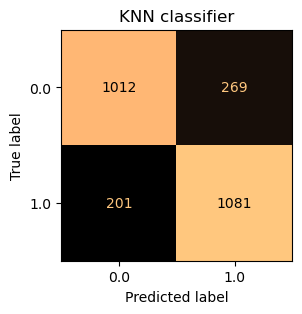

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(3,3))
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,colorbar=False,cmap="copper",ax=ax);
ax.set_title("KNN classifier");

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1281
         1.0       0.80      0.84      0.82      1282

    accuracy                           0.82      2563
   macro avg       0.82      0.82      0.82      2563
weighted avg       0.82      0.82      0.82      2563



In [25]:
score_df = pd.DataFrame({
                         "LogisticRegression":0.53,
                         "KNN classfier":0.89,
                         "SVM classifier":0.84},index=["accuracy"])
score_df

,LogisticRegression,KNN classfier,SVM classifier
accuracy,0.53,0.89,0.84


In [33]:
list(score_df.T.index), list(score_df.T.accuracy)

(['LogisticRegression', 'KNN classfier', 'SVM classifier'], [0.53, 0.89, 0.84])

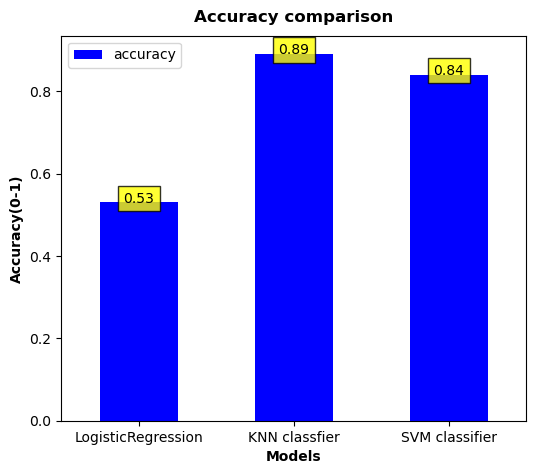

In [52]:

def addlabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.8))
        
score_df.T.plot(kind='bar',figsize=(6,5),color="b");
#ax.set_xticklabels(['LogisticRegression','KNN classfier','SVM classifier'],rotation=10)
plt.title("Accuracy comparison",fontdict={"fontweight":"bold"},pad=10)
plt.xticks(rotation=0)
addlabel(list(score_df.T.index), list(score_df.T.accuracy))
plt.xlabel("Models",fontdict={"fontweight":"bold"})
plt.ylabel("Accuracy(0-1)",fontdict={"fontweight":"bold"})
plt.legend(loc=2)
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\accuracy.png")


In [53]:
import pickle
filename = "knn_eeg_model.pkl"
pickle.dump(classifier,open(filename,'wb'))